##  INF 352: Lab 2 
Elisabeth Vehling

In [737]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
from scipy import stats
import numpy as np
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

**(A) Download/import data**

In [738]:
data = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", index_col=None, dtype=float)

In [739]:
r,c = data.shape

**(B) Exploring the Data**

**(i) Rows, columns, and what they represent**

In [740]:
print(f"Rows: {r}, Columns: {c}")

Rows: 9568, Columns: 5


The rows in this dataset represent recordings of average ambient recordings at a given point in time. The readme did not specify exactly how frequently, but said that the data was collected over a period of 6 years. I did some calculations and found that averages to be around 4 recordings per day.
The columns represent several types of average ambient recordings from different aspects of the power plant; Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). The last column, net hourly electrical energy output (EP) of the plant, is what these variables should predict.

**(ii) Pairwise scatterplots**

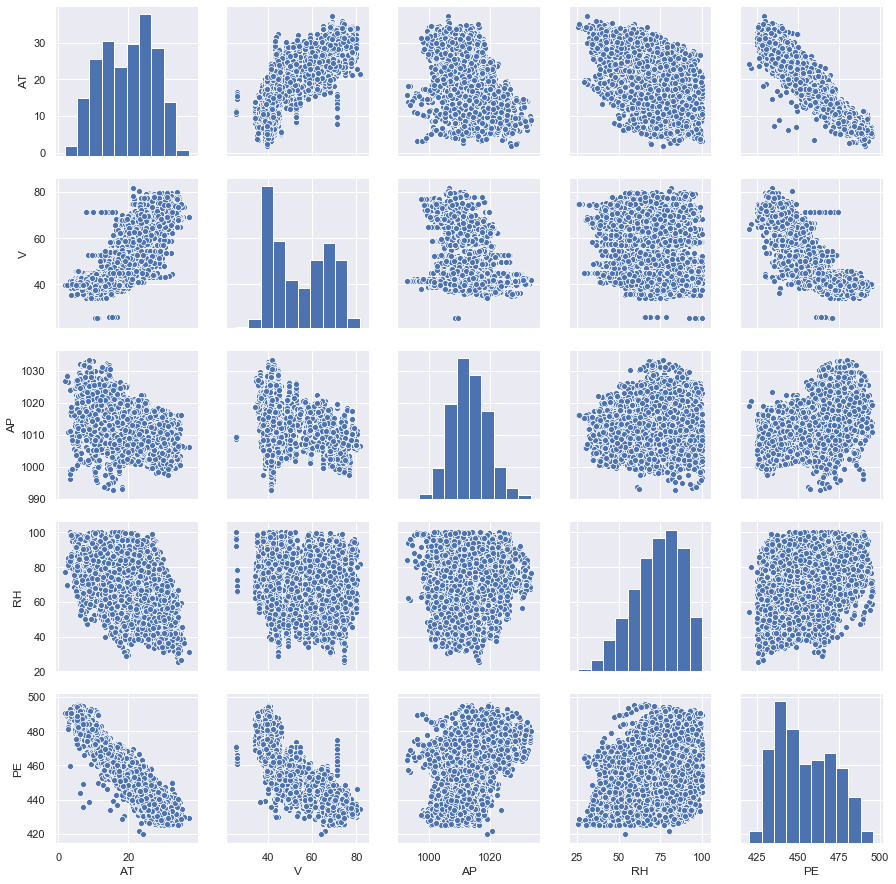

In [757]:
sns.pairplot(data)

**Describe your findings:** It seems like PE and AT are negatively correlated as well as V and PE, but less so. V and AT seem to be positively correlated. RH and AT also seem to be negatively correlated but less tightly (more spread). AP seems to be similar to normally distributed. RH has too much spread to see any strong correlations with V, AP or PE.

**(iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.**

In [758]:
AT = data.iloc[:,0]
V = data.iloc[:,1]
AP = data.iloc[:,2]
RH = data.iloc[:,3]
PE = data.iloc[:,4]

In [759]:
variables = [AT,V,AP,RH,PE]
#mean, median, range, 25%, 75%, 50%
d = {'Variable':['AT','V','AP','RH','PE'],'Mean': [AT.mean(),V.mean(),AP.mean(),RH.mean(),PE.mean()]
     , 'Median': [AT.median(),V.median(),AP.median(),RH.median(),PE.median()],
    'Min':[AT.min(), V.min(), AP.min(),RH.min(),PE.min()],
    'Max':[AT.max(),V.max(),AP.max(),RH.max(),PE.max(),],
    'Min':[AT.min(),V.min(),AP.min(),RH.min(),PE.min()],
    '25%':[AT.quantile(0.25),V.quantile(0.25),AP.quantile(0.25),RH.quantile(0.25),PE.quantile(0.25)],
    '50%':[AT.quantile(0.5),V.quantile(0.5),AP.quantile(0.5),RH.quantile(0.5),PE.quantile(0.5)], 
     '75%':[AT.quantile(0.75),V.quantile(0.75),AP.quantile(0.75),RH.quantile(0.75),PE.quantile(0.75)],
    'Range':[(AT.max()-AT.min()),V.max()-V.min(),AP.max()-AP.min(),RH.max()-RH.min(),PE.max()-PE.min()]}
describe = pd.DataFrame(data=d)
describe

,Variable,Mean,Median,Min,Max,25%,50%,75%,Range
0,AT,19.651231,20.345,1.81,37.11,13.5100,20.345,25.72,35.30
1,V,54.305804,52.080,25.36,81.56,41.7400,52.080,66.54,56.20
2,AP,1013.259078,1012.940,992.89,1033.30,1009.1000,1012.940,1017.26,40.41
3,RH,73.308978,74.975,25.56,100.16,63.3275,74.975,84.83,74.60
4,PE,454.365009,451.550,420.26,495.76,439.7500,451.550,468.43,75.50


**(C) Fit a linear regression model for each predictor**

**Linear Regression for AT**

In [760]:
import statsmodels.api as sm
# Since sklearn doesn't have pvalues built in for some reason,
#I'm using the statsmodel library to display the summary of the model
X = data['AT']
y = data['PE']
X2 = sm.add_constant(X)
estimate = sm.OLS(y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:55:07   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Results:** This generated a linear model with an intercept at 497.0341 and a slope of -2.1713. The p-value for this model is extremely small, (smaller than 0.001). The r-squared value is also quite high, which indicates that there may be a strong relationsip between the two variables. The F statistic is extremely large which (in combination with the extremely low p-value) seems sufficient to reject the null hypothesis (that there is not a statistically significant association between predictor and response).

In [761]:
#To visualize the actual difference between predicted and actual values,
#I split into train and test groups and graphed the difference
#Get x values (AT column), Y values, and train test split
X = data.iloc[:,0:1]
y = data.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Make regressor and fit with training values
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#Predict the y values from x test set, and create df with predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

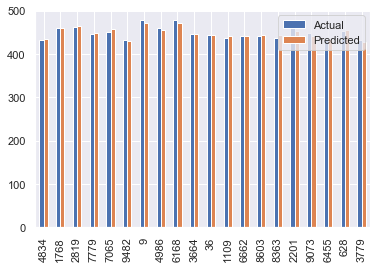

In [762]:
#Plot differences of some of of the actual vs expected values
df1 = df.head(20)
df1.plot(kind='bar',figsize=(6,4))

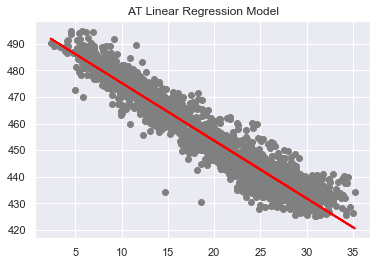

In [767]:
#Plot the model
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("AT Linear Regression Model")
plt.show()

**Outliers:**
After examining the plot, there appear to be several outliers present but it doesn't seem to be affecting the model's accuracy too badly so I would not remove them.

**Linear Regression for V**

In [769]:
#Print summary of model for V
X = data['V']
y = data['PE']
X2 = sm.add_constant(X)
estimate = sm.OLS(y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        16:59:22   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

**Results:** This model generated an intercept of 517.8015 and a slope of -1.1681 with a p-value below 0.001.The r-squared value was 0.757 and F-statisitc was 29720. The r-squared value was quite high once again indicating that the data fits the model relatively well and I believe that the combination of the extremely low p value and large f-statistic are enough to reject the null hypothesis.

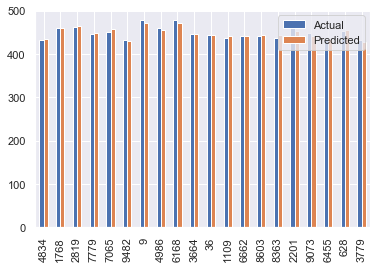

In [770]:
#Visualize some of the differences between actual and expected data
X = data.iloc[:,1:2]
Y = data.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Make regressor and fit with training values
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
actExpt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1 = df.head(20)
df1.plot(kind='bar',figsize=(6,4))

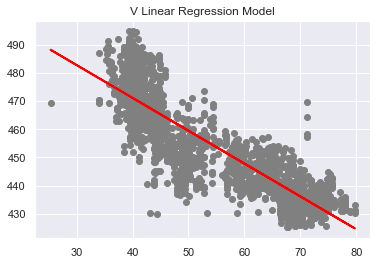

In [771]:
#Plot the model and data points
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("V Linear Regression Model")
plt.show()

**Outliers:** Similar to the last model, there do appear to be 7-8 significant outliers in this model, but I don't think I would remove them. Just looking at the shape of the data, though, I think that this could be better fit with a nonlinear model.

**Linear Regression for AP**

In [772]:
#Print summary of model for RH
X = data['AP']
y = data['PE']
X2 = sm.add_constant(X)
estimate = sm.OLS(y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:00:13   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Results:** This model generated an intercept of -1055.2610 and a slope of 1.4899. The p-value was once again below 0.001, but the r-squared was lower than the previous models. However, given that the f-statistic was large once again, I'd say that there is a statistically significant association between these two variables.

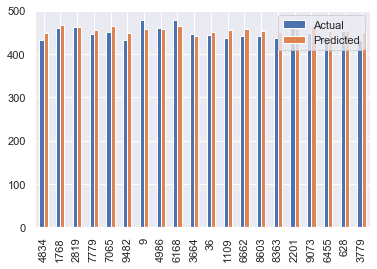

In [773]:
X = data.iloc[:,2:3]
y = data.iloc[:,4]

# Split into train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Make regressor and fit with training values
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#Predict the y values from x test set, and create df with predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
#Plot differences of some of of the actual vs expected values
df1 = df.head(20)
df1.plot(kind='bar',figsize=(6,4))

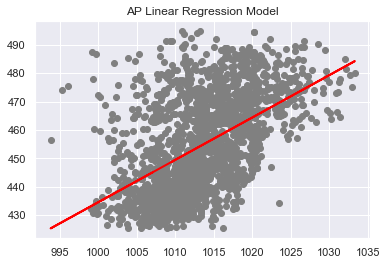

In [774]:
#Plot the model
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("AP Linear Regression Model")
plt.show()

**Outliers:** As discussed above, the r-squared of this variable was significantly lower than the first two, which is displayed in this figure rather nicely. The grouping of the data around the model is much less tight than the previous models. There are outliers once again, but in this case I don't believe removing them would have a noticeable effect on the model given that the spread is already so large.

**Linear Regression for RH**

In [775]:
#Print summary of model for RH
X = data['RH']
y = data['PE']
X2 = sm.add_constant(X)
estimate = sm.OLS(y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:06:20   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Results:** This model had a coefficient of 420.9618 and a slope of 0.4557. The R-squared value was also much lower than the previous predictors but the p-value was extremely small and the f-statistic was large which indicates that there is a statistically significant relationship between RH and EP.

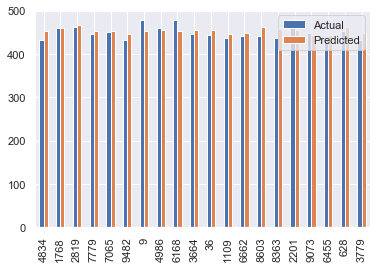

In [776]:
#Plot Expected vs actual values
X = data.iloc[:,3:4]
y = data.iloc[:,4]

# Split into train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Make regressor and fit with training values
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#Predict the y values from x test set, and create df with predictions
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
#Plot differences of some of of the actual vs expected values
df1 = df.head(20)
df1.plot(kind='bar',figsize=(6,4))

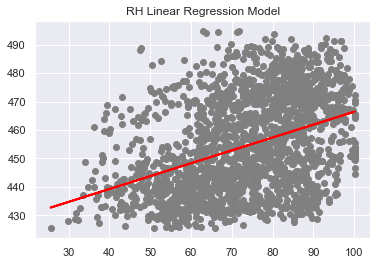

In [777]:
#Plot the model
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("RH Linear Regression Model")
plt.show()

**Outliers:** Like AP, the data were not as tightly bound to the model (as indicated by the low r squared value), so I don't beleive that removing outliers would cause a large difference. The model does seem to capture the general positive trend of the data though.

**(d) Multiple regression model**

In [778]:
#Build multiple regresion model and summarize results
X = data.iloc[:,0:4]
Y = data.iloc[:,4]
X2 = sm.add_constant(X)
estimate = sm.OLS(Y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:07:04   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Results:** The r-squared value for this model is extremely high (0.929), which indicates the data fit the model very well. The p-values for each of the predictors is 0.000, which in combination with the high f-statistic for the model means that we can likely reject the null for all of the predictors.

In [842]:
#Isolate coefficients for each predictor
X = data.iloc[:,0:4]
Y = data.iloc[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

pred_i = regressor.predict(X_test)
mean_error = mean_squared_error(pred_i, y_test)
print("Multiple Linear Regression Error:",mean_error)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

Multiple Linear Regression Error: 19.733699303497648
    Coefficient
AT    -1.973131
V     -0.236500
AP     0.063879
RH    -0.158070


**(e) Plot univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.**

Text(0.5, 1.0, 'Regression Coefficients')

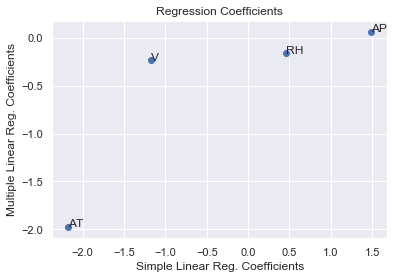

In [780]:
#Plot the points
x = [-2.1713,-1.1681,1.4899,0.4557 ] #univariate coefficients
y = [-1.9775,-0.2339,0.0621,-0.1581] #coefficients from multiple LR
fig = plt.scatter(x,y)

#Label the points
plt.text(-2.1713,-1.9775,'AT') 
plt.text(-1.1681,-0.2339,'V')
plt.text(1.4899,0.0621,'AP')
plt.text(0.4557,-0.16,'RH')

#Label figure
plt.xlabel("Simple Linear Reg. Coefficients")
plt.ylabel("Multiple Linear Reg. Coefficients")
plt.title("Regression Coefficients")

**(f) Fit predictors to nonlinear model**

**AT Nonlinear Model**

In [781]:
#Fit AT data to polynomial
x = data.iloc[:,0:1]
y = data.iloc[:,4]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Fit model with adjusted AT
estimate = sm.OLS(y, x_poly).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:08:27   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

**Results:** There is evidence of non-linear association between AT and PE; the r-squared value is very high, which indicates that the data fits the non-linear model closely. As seen in the plot below, the model visually captures the trend of the data as well. Furthermore, the p values are once again 0.000 and the f statistic is very high which indicates that there is likely a nonlinear association between AT and PE.

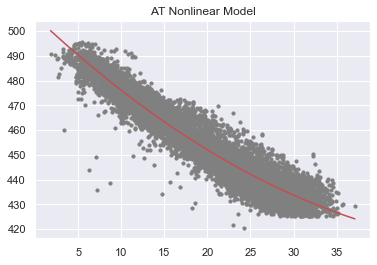

In [786]:
#Plot the new model and data
x = data['AT']
y = data['PE']
x = x[:, np.newaxis]
y = y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10, color='gray')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.title("AT Nonlinear Model")
plt.show()

**V Nonlinear Model**

In [787]:
#Fit V data to polynomial
x = data.iloc[:,1:2]
y = data.iloc[:,4]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Fit model with adjusted AT
estimate = sm.OLS(y, x_poly).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:09:56   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

**Results:** The r-squared value of this model indicates that the data fits the model relatively well; the f statistics once again very high, and the p-values are very low. I'd say that there is evidence of non linear assocation btween V and PE, althought the data does not fit the model as tightly as the previous feature.

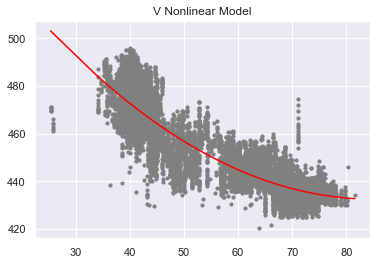

In [789]:
#Plot the new model and data
x = data['V']
y = data['PE']
x = x[:, np.newaxis]
y = y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10, color='gray')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='red')
plt.title("V Nonlinear Model")
plt.show()

**RH Nonlinear Model**

In [790]:
#Fit RH data to polynomial
x = data.iloc[:,2:3]
y = data.iloc[:,4]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Fit model with adjusted AT
estimate = sm.OLS(y, x_poly).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:10:47   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

**Results:** The r-squared value is significantly lower than the those of V and AT, which indicates that the data does not fit the model very well. This is also seen pretty clearly in the figure below. However, the pvalues are very low and f-statistics are still low and high, respectively, so there may be evidence of non-linear association. 

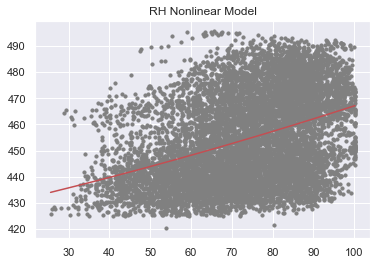

In [792]:
#Plot the new model and data
x = data['RH']
y = data['PE']
x = x[:, np.newaxis]
y = y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10, color='gray')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.title("RH Nonlinear Model")
plt.show()

**AP Nonlinear model**

In [793]:
#Fit AP data to polynomial
x = data.iloc[:,3:4]
y = data.iloc[:,4]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

#Fit model with adjusted AT
estimate = sm.OLS(y, x_poly).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:12:25   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

**Results:** The r-squared value of this model was extremely low, and the f-statistic was noticeably lower than the previous features' f-statistics. Furthermore, the p-value of one of the coefficients (x2) was 0.215. I'd say that there is not sufficient evidence enought to reject the null hypothesis in this case. 

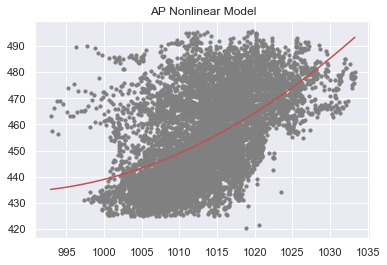

In [794]:
#Plot the new model and data
x = data['AP']
y = data['PE']
x = x[:, np.newaxis]
y = y[:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10, color='gray')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.title('AP Nonlinear Model')
plt.show()

**(g) Is there evidence of association of interactions of predictors with the response?**

In [795]:
#Generate pairwise interaction terms:
#multiply the pair columns together, then use those new multiplied columns and create multiple linear regression 
d = {'AT/V': data['AT']*data['V'], 'AT/AP': data['AT']*data['AP'],'AT/RH':data['AT']*data['RH'], 'V/AP': data['V']*data['AP'],
   'V/RH':data['V']*data['RH'],'AP/RH':data['AP']*data['RH']}
pairwise = pd.DataFrame(data=d)

In [796]:
#Concatenate the regular predictors with pairwise interaction terms
frames = [data.iloc[:,0:4],pairwise]
X= pd.concat(frames, axis=1)
Y = data.iloc[:,4]
#Fit model
X2 = sm.add_constant(X)
estimate = sm.OLS(Y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:14:31   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Results:** The p values for AT, AT/AP, V/RH were above the cutoff for being statistically significant (0.05). There is evidence that AT/V, AT/RH, V/AP, and AP/RH are statistically significant as all of their p-values were below the cutoff. However, since the p-value for AT was above the cutoff its interaction terms could also be affected even if the p-value for the interaction terms was low.

**(h) KNN regression**

In [839]:
from sklearn.model_selection import train_test_split
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,4], test_size=0.33, random_state=42)

In [840]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#Caluclate test error and best K
test_error = [] #Array to store the test errors for each K
min_error = 100 #lowest training error rate
min_k = 100 #K that produces the best training error rate
for i in range(1,100,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mean_error = mean_squared_error(pred_i, y_test)
    test_error.append(mean_error)
    if(mean_error < min_error): #Update the minimum error and best K
        min_k = i
        min_error = mean_error
best_test_K = min_k
best_test_error = min_error
print("Best Test K:", best_test_K)
print("Best Test Error (raw)",best_test_error)

Best Test K: 5
Best Test Error (raw) 16.03184347055099


Text(0, 0.5, 'Mean Squared Error')

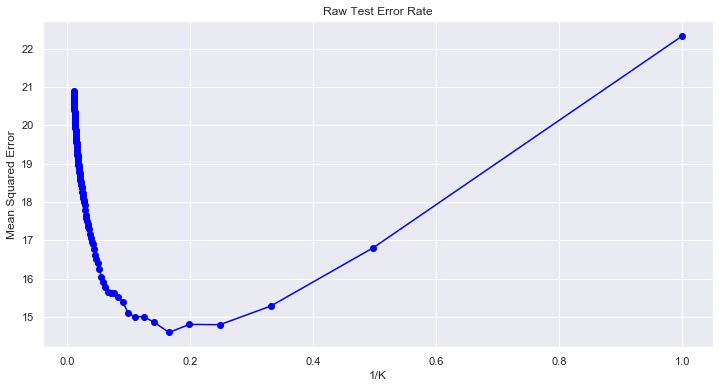

In [799]:
#Plot test error
plt.figure(figsize=(12, 6))
xaxis = np.linspace(1,100,99)
xaxis = 1/xaxis
plt.plot(xaxis, test_error, color='blue', marker='o',
          markerfacecolor='blue', markersize=6)
plt.title('Raw Test Error Rate')
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')

In [800]:
#Calculate train error (raw)
#Repeat the above process but with the training data
train_error = [] 
min_error = 100 
min_k = 100 
for i in range(1,100,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    mean_error = mean_squared_error(pred_i, y_train)
    train_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_train_K = min_k
best_train_error = min_error
print("Best Train K:",best_train_K)

Best Train K: 1


Text(0, 0.5, 'Mean Squared Error')

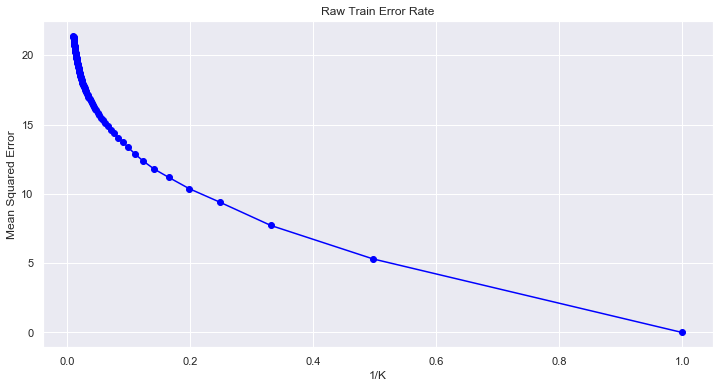

In [801]:
#Plot raw train errors
plt.figure(figsize=(12, 6))
xaxis = np.linspace(1,100,99)
xaxis = 1/xaxis
plt.plot(xaxis, train_error, color='blue', marker='o',
          markerfacecolor='blue', markersize=6)
plt.title('Raw Train Error Rate')
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')

In [803]:
#Repeat the above process but with normalizing the data
from sklearn import preprocessing
#Normalize the data
X_normalized = preprocessing.normalize(data.iloc[:,0:4])
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, data.iloc[:,4], test_size=0.33, random_state=42)

Best Test K: 5
Best Test Error (Normalized): 15.6635051689307


Text(0, 0.5, 'Mean Squared Error')

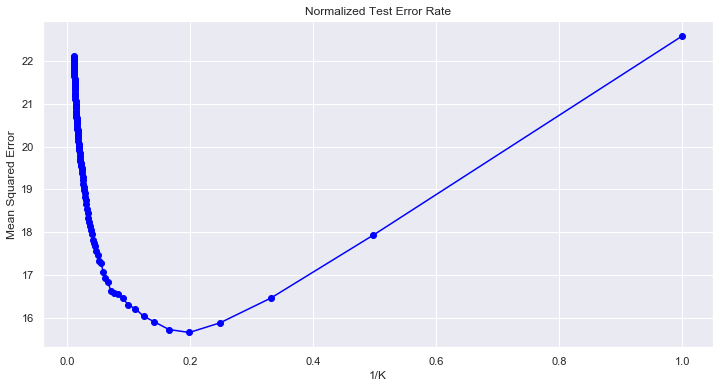

In [837]:
#Calculate normalized test errors
test_error = [] 
min_error = 100
min_k = 100 
for i in range(1,100,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mean_error = mean_squared_error(pred_i, y_test)
    test_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_test_K = min_k
best_test_error = min_error
print("Best Test K:",min_k)
print("Best Test Error (Normalized):", best_test_error)
#Plot normalized test error
plt.figure(figsize=(12, 6))
xaxis = np.linspace(1,100,99)
xaxis = 1/xaxis
plt.plot(xaxis, test_error, color='blue', marker='o',
          markerfacecolor='blue', markersize=6)
plt.title('Normalized Test Error Rate')
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')

Best K: 1


Text(0, 0.5, 'Mean Squared Error')

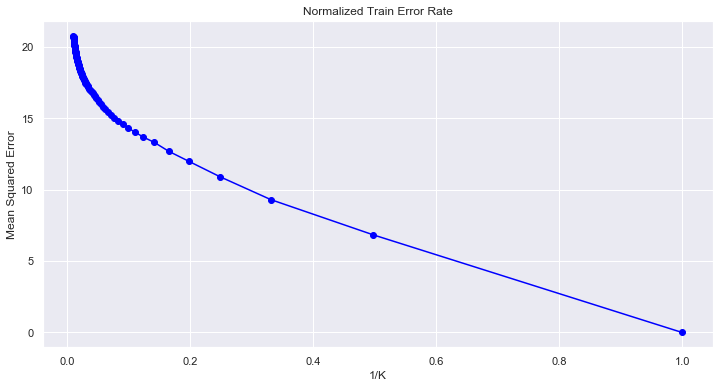

In [805]:
#Calculate normalized train error
train_error = [] 
min_error = 100 
min_k = 100 
for i in range(1,100,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_train)
    mean_error = mean_squared_error(pred_i, y_train)
    train_error.append(mean_error)
    if(mean_error < min_error): 
        min_k = i
        min_error = mean_error
best_train_K = min_k
best_train_error = min_error
print("Best K:", best_train_K)

#Plot normalized train errors
plt.figure(figsize=(12, 6))
xaxis = np.linspace(1,100,99)
xaxis = 1/xaxis
plt.plot(xaxis, train_error, color='blue', marker='o',
          markerfacecolor='blue', markersize=6)
plt.title('Normalized Train Error Rate')
plt.xlabel('1/K')
plt.ylabel('Mean Squared Error')


**(i) Extra credit: Improving model**

In [807]:
#Randomly select 70% of data for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:4], data.iloc[:,4], test_size=0.3, random_state=0)
X2 = sm.add_constant(X_train)
#Train model with all predictors
estimate = sm.OLS(y_train, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:22:23   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        448.5613     11.745     38.192      0.0

In [815]:
#Generate interaction terms from training data
d = {'AT/V': X_train['AT']*X_train['V'], 'AT/AP': X_train['AT']*X_train['AP'],'AT/RH':X_train['AT']*X_train['RH'], 'V/AP': X_train['V']*X_train['AP'],
   'V/RH':X_train['V']*X_train['RH'],'AP/RH':X_train['AP']*X_train['RH']}
new_pairwise = pd.DataFrame(data=d)

#Fit each predictor to quadratic
polynomial_features= PolynomialFeatures(degree=2)
poly_fit = polynomial_features.fit_transform(X_train)
#Fit model with interaction terms, regular variables, and quadratic nonlinearities
estimate = sm.OLS(y_train,poly_fit).fit()
print(estimate.summary())
#So the issue I'm running into is that this correctly generates the 
#interaction terms, variables, and quadratic nonlinearorites but I can't
#figure out how to display names. So instead I just made a model without
#using poly fit so I could actually see the column names and drop them

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7075.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:27:50   Log-Likelihood:                -19248.
No. Observations:                6697   AIC:                         3.853e+04
Df Residuals:                    6682   BIC:                         3.863e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7073.1567   1505.522     -4.698      0.0

In [816]:
#Model with no quadratic nonlinearities
frames = [X_train.iloc[:,0:4],new_pairwise]
X= pd.concat(frames, axis=1)
Y = y_train
X2 = sm.add_constant(X)
estimate = sm.OLS(Y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     9682.
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:28:18   Log-Likelihood:                -19322.
No. Observations:                6697   AIC:                         3.867e+04
Df Residuals:                    6686   BIC:                         3.874e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        712.9146     96.523      7.386      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [824]:
#As seen above, AT, AP, RH, AT/AP, V/RH, and AP/RH are all above the cutoff
#value, so I dropped them and any of their interaction terms
X = X_train[['V']]
X2 = sm.add_constant(X)
estimate = sm.OLS(Y, X2).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 2.091e+04
Date:                Fri, 14 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:32:20   Log-Likelihood:                -23752.
No. Observations:                6697   AIC:                         4.751e+04
Df Residuals:                    6695   BIC:                         4.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8285      0.451   1149.405      0.0

In [832]:
#Test both models with the test data

#Make regressor with dropped data and fit with training values
regressor = LinearRegression()  
regressor.fit(X, y_train)

#Predict the y values from x test set, and create df with predictions
y_pred = regressor.predict(X_test[['V']])
print('MSE (dropped):',mean_squared_error(y_test, y_pred))

MSE (dropped): 71.92187535883667


In [836]:
#Test both models with the test data
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('MSE:',mean_squared_error(y_test, y_pred))

MSE: 20.36838300288591


**(j) Compare KNN Regression with linear regression model (Extra Credit)**

KNN Best Test Error (Normalized): 15.6635051689307
KNN Best Test Error (raw) 16.03184347055099
Multiple Linear Regression Error (best): 19.733699303497648

KNN Regression produced less error than the best linear regression model I had. I think that this could be attributed to the fact that unlike linear regression, KNN is a non-parametric model that does not assume the shape of the data. Linear regression assumes that our data is linear in shape, but as shown in modeling the individual predictors above, 3/4 of the predictors showed evidence that they may be nonlinearly associated. On the other hand, KNN regression identifies the closest training observations to the prediction point and estimates using the average of all responses which could explain why the testing error was lower than even the best of the linear regression models.
